## Choosing and Explaining Likely Caravan Insurance Customers
Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplots
- MASS 
- leaps
- olsrr
- lattice
- glmnet


## Introduction

Data analysis is a common practice that is being followed widely these days on the available amount of data that is being present everywhere. For this assessment we are provided with data related to car insurance. The main focus of the task would be analysing the provided data and provide insights that would be helpful. To be precise we need to explore and analyse the data to come with a marketing strategy that would focus on a targeted set of customers who would buy a caravan insurance policy. But the analysis results are to be explained in a format which can be understood by people who doesn't have a technical background. When the results are presented in layman terms, the marketing department could come with better strategies.

The training data set consists information of 5822 customers where the purchase of caravan insurance policy is indicated, and the test data has 4000 customers where the purchase of caravan insurance policy is not provided. But the values for these 4000 customers are given in a different text file. We need to come with a set of 800 customers from the test data who has a high probability of purchasing a caravan policy. In order to predict the best set of 800 customers we need to build three different types of models, compare which model is giving us a good score. The procedure for variable selection, model building, model comparison and selecting final the set of customers is explained in the following sections.

The first 43 columns of the dataset represents the socio demographic attributes of the customer. These socio demographic are the same for all the customers who belong to the same zip code. The next 42 columns are attributes related to ownership of products by the customer. The final column represents the purchase of caravan policy by the customer. 0 and 1 are the only value possible for the last column.

Meta data is available at http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html

In [120]:
#Installing packages
#require("leaps")
#require("ggplot2")
#require("olsrr")
#require("MASS")
#Require("lattice")

#Required libraries
library(leaps)   #For finding subset of variables
library(ggplot2)  #Plotting purpose
library(olsrr)   #Finding the VIF and Tolerance
library(MASS)    #Package for stepwise selection
library(lattice)  #For plotting purpose
library(glmnet)  #Used for cross validation

### Loading the train, test and test labels data

All the data that is provided to us are in txt files which are read into R using read.table function. The columns are provided as V1, V2 and so on. These are not the actual column names of the data. Meta data is available at http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html

In [67]:
#Reading the train data and test data
trainData = read.table("train.txt", header = FALSE)
testData =  read.table("test.txt", header = FALSE)
head(trainData)
tail(trainData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
5817,3,1,2,3,1,0,6,0,3,6,...,0,0,0,0,0,0,0,0,0,0
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
5822,33,1,3,3,8,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,0


## Data Exploration

### Statistics and Summary of data

Once the required datasets are loaded into R, the basic information regarding the data can be printed in order to get the structure and the types of variables. Apart from this we can also understand what are the minimum and maximum values for each column. The number of unique values for each column is also printed in the below cell. This would be useful to know what is the range for each variable.

In [68]:
# Statistics of the training data
sapply(trainData,class)
summary(trainData)
lengths(lapply(trainData, unique))

V1        V2        V3        V4        V5        V6        V7        V8 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
       V9       V10       V11       V12       V13       V14       V15       V16 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V17       V18       V19       V20       V21       V22       V23       V24 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V25       V26       V27       V28       V29       V30       V31       V32 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V33       V34       V35       V36       V37       V38       V39       V40 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V41       V42       V43       V44       V45       V46       V47       V48 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V49       V50       V51       V52       V53       V54       V55       V56 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V57       V58       V59       V60       V61       V62       V63       V64 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V65       V66       V67       V68       V69       V70       V71       V72 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V73       V74       V75       V76       V77       V78       V79       V80 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      V81       V82       V83       V84       V85       V86 
"integer" "integer" "integer" "integer" "integer" "integer"

       V1              V2               V3              V4       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       V5               V6               V7              V8      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
       V9             V10             V11              V12      
 Min.   :0.

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
 40   9   5   6  10  10  10   6  10  10   8  10  10  10  10  10  10  10  10   6 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
 10  10  10  10  10  10  10  10   9  10  10  10   8  10  10  10  10  10  10  10 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  8  10   8   4   7   4   6   4   6   4   6   5   5   6  10   7   3   5   9   3 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  7   2   7   5   3   3   2   7   5   4   4   4   5   5   3   6   2   2   3   7 
V81 V82 V83 V84 V85 V86 
  2   3   4   3   3   2

We need to convert the response variable to a factor as the possible values for the response are only 0 and 1. From the statistics we can see that the response is also just a number.

In [71]:
trainData$V86 = as.factor(trainData$V86)

### Exploring the relationship

Let's do some plotting between few columns which we think would influence the purchase of caravan policy by customer. This can be selected by our intution before selecting a subset from them to build a model. From the given variables we can select the customer type, customer sub type, education level, age, income are some of the variables which might influence the response. 

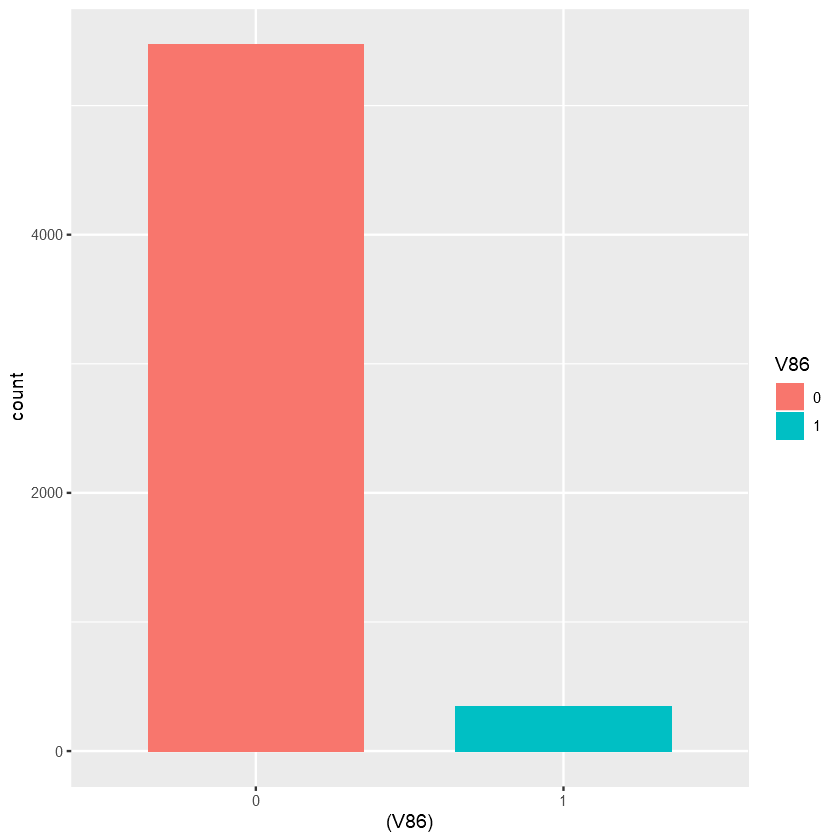

In [72]:
ggplot(trainData, aes(x=(V86),fill = V86)) +
geom_bar(stat="count", width=0.7)


From the above graph we can see that the number of customers without a caravan policy is much greater than the customers who have a caravan policy. Exploring the data by each value of response variable would be more insightful. Hence few plots will be only for the rows that have the response variable is 1 rather than 0.  

### Plotting the customer main type with the number of caravan policies

By plotting the number of people in each customer type according to the number of caravan policies, we can see which group has more policies and which group has the least caravan policies.

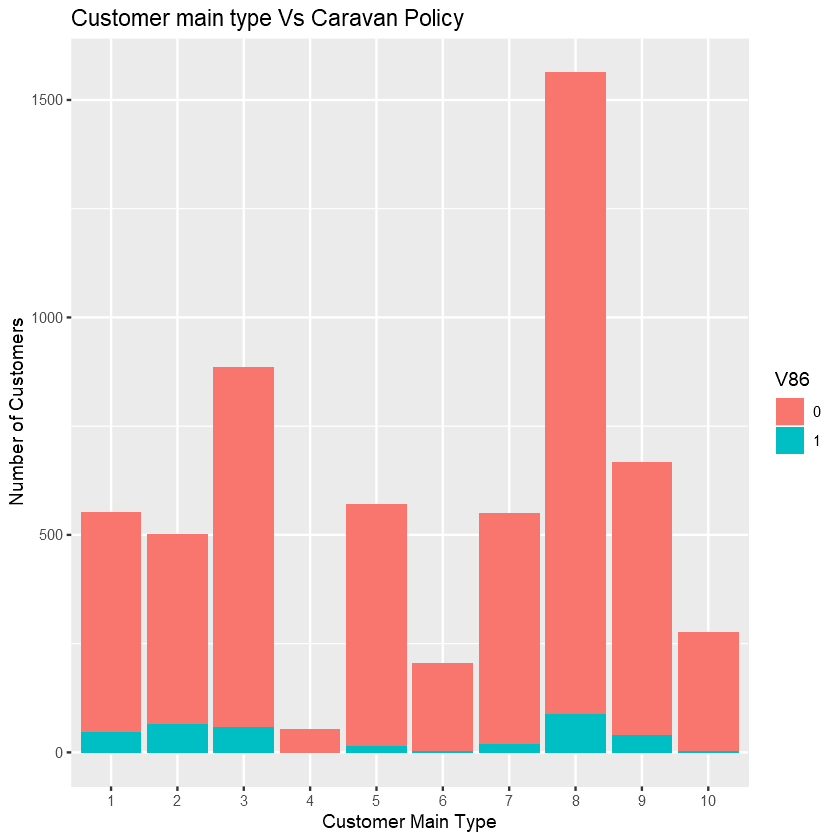

In [85]:
#barplot using ggplot
ggplot(trainData, aes(factor(V5))) + 
labs(y = "Number of Customers", x = "Customer Main Type", title = "Customer main type Vs Caravan Policy") +
geom_bar(aes(fill = V86))

#### Insights from plot

As we can see that the number of customers belonging to customer type "Family with grown ups" is the highest in the provided data. Interestingly the number of customers with and without caravan policies are also highest in this type. The customer types "Driven Growers", "Average family", "Successful hedonists", "Conservative families" have the nearly same caravan policies number. But when "Driven Growers" type has the highest number of caravan policies when compared with the total number of customers in that type. The "Career Loners" type doesn't have a single customer who bought a caravan policy.

### Plotting the customer subtype with the number of caravan policies

Let's divide the customer type into more groups. The first column in the data provided us with that information.

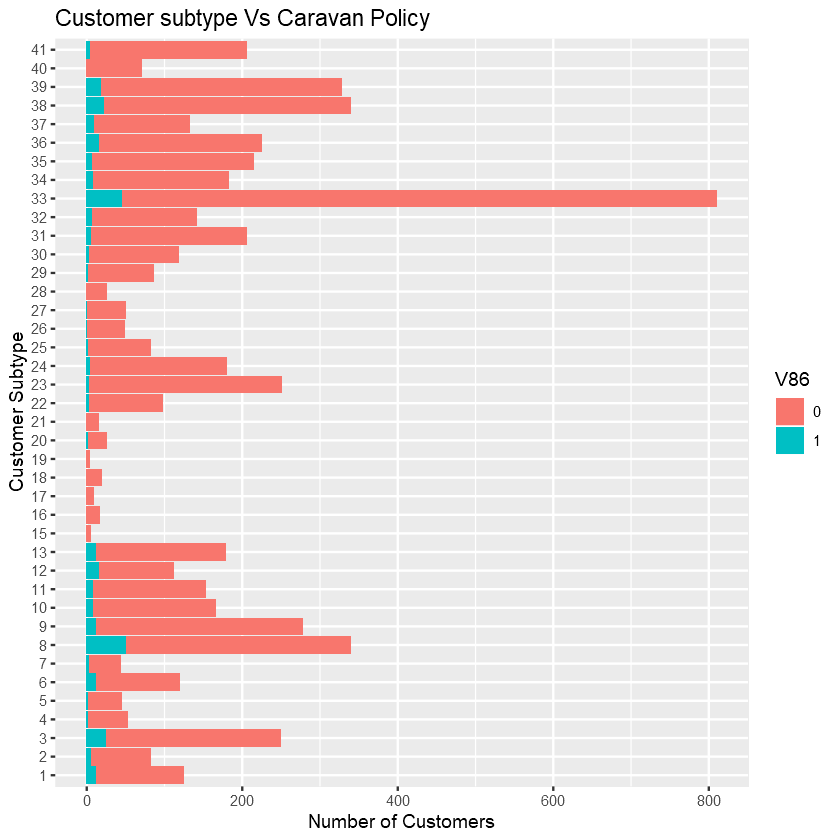

In [86]:
#Plot for the data
ggplot(trainData, aes(factor(V1)))+
labs(y = "Number of Customers", x = "Customer Subtype", title = "Customer subtype Vs Caravan Policy")+
geom_bar(aes(fill = V86)) +coord_flip()

#### Insights from plot

Insights similar to customer main type can be made for customer subtype also. The subtypes "Middle class families" and "Lower class large families" have the highest number of caravan policies compared to all the subtypes. But the total number of customers is large in "Lower class large families". The next subtype that has more caravan policies is "High Status seniors" followed by "Traditional families" and "Large religious families". The subtypes like "Junior Cosmopolitans", "Senior Cosmopolitans", "Students in apartments", "Fresh Masters in the city", "Single youth", "Suburban youth" and "Young urban have-nots" have a zero number of caravan policies even though the number of customers is less compared to other subtypes.

### Plotting the Average Age with the number of caravan policies

Let's observe how the average age of changed the customer decision of purchasing a caravan policy.

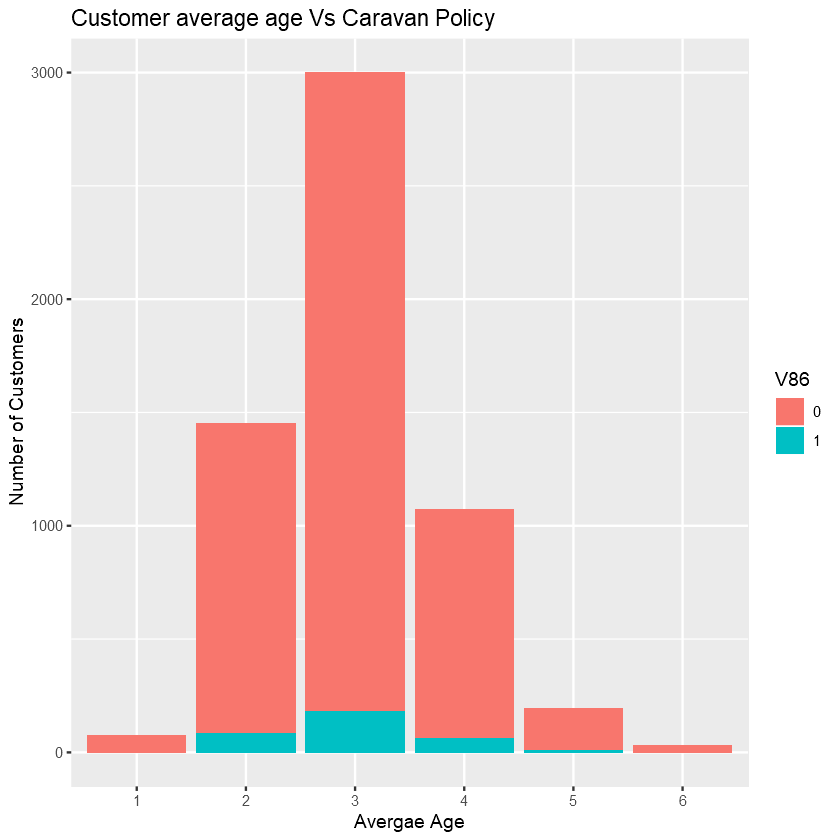

In [89]:
#Plot of average age vs caravan policy
ggplot(trainData, aes(factor(V4))) + geom_bar(aes(fill = V86)) +
labs(y = "Number of Customers", x = "Avergae Age", title = "Customer average age Vs Caravan Policy")

#### Insights from plot

We can see an approximate normal distribution for the average age column. Customers who are in an age group of 40-50 years has the most number of caravan policies and the customers in age groups 20-20 and 70-80 has absolute zero customers with caravan insurance policies. This can be true in general but there can always be exceptions.  

All the above variable are from the socio demographic attribute of a customer. Let's consider some of the factors from the product ownership of the customers. In general sense number of car insurance policies, number of fire insurances policies, number of life insurance policies and number of third party insurances might have an impact on the customer purchasing a caravan policy. But we need to explore in detail about all these. The following sections show the same. For all the below plots we are gonna subset only the customers who purchased a caravan insurance policy.

### Plotting the number of motor vehicle policies with caravan policies

Let's see how the distribution of customers vehicle insurance policies is affecting the customers' caravan insurance purchase policy. Here all the vehicle insurances (car + delivery van + motorcycle/scooter + lorry + trailer + tractor + agriculture machines + moped) are added up 

In [101]:
trainData$vehicles = trainData$V68+trainData$V69+trainData$V70+
trainData$V71+trainData$V72+trainData$V73+trainData$V74+trainData$V75

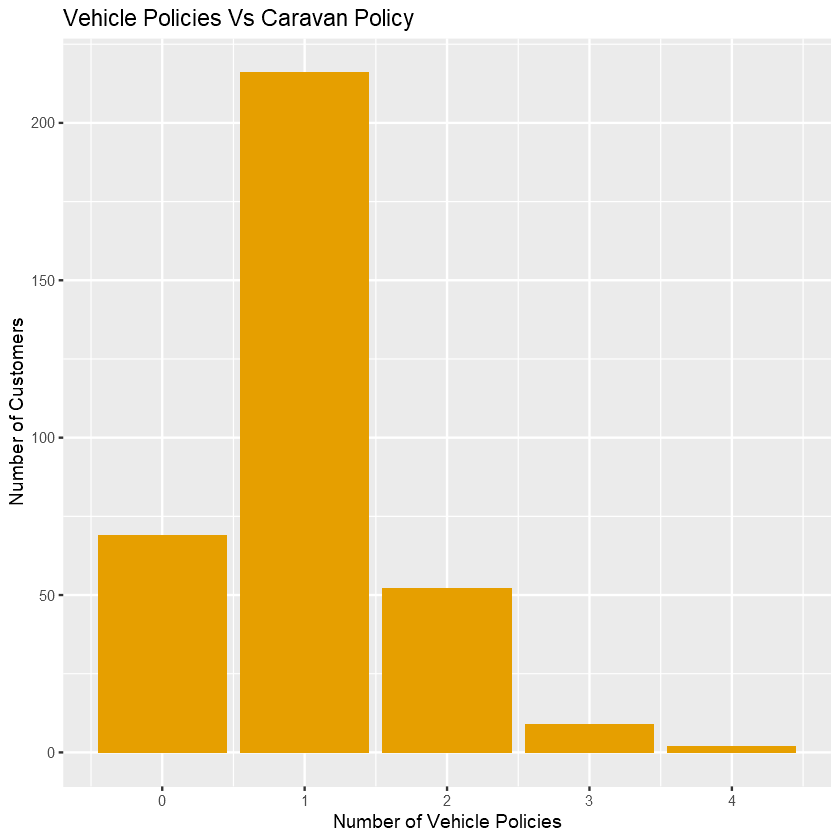

In [112]:
#Plot of number of car policies vs caravan policy
ggplot(trainData[trainData$V86==1,], aes(vehicles)) + geom_bar(fill = "#E69F00") +
labs(y = "Number of Customers", x = "Number of Vehicle Policies", title = "Vehicle Policies Vs Caravan Policy")

#### Insights from the plot
The customers with 1 vehicle policy are most among all the customers. A caravan policy is purchased most by customers with a with 1 vehicle insurance policy followed by customers with 0 vehicle insurance policy. This is an interesting insight because a customer without a vehicle insurance policy owns a caravan insurance policy.

### Plotting the number of life insurance policies with caravan insurance policy



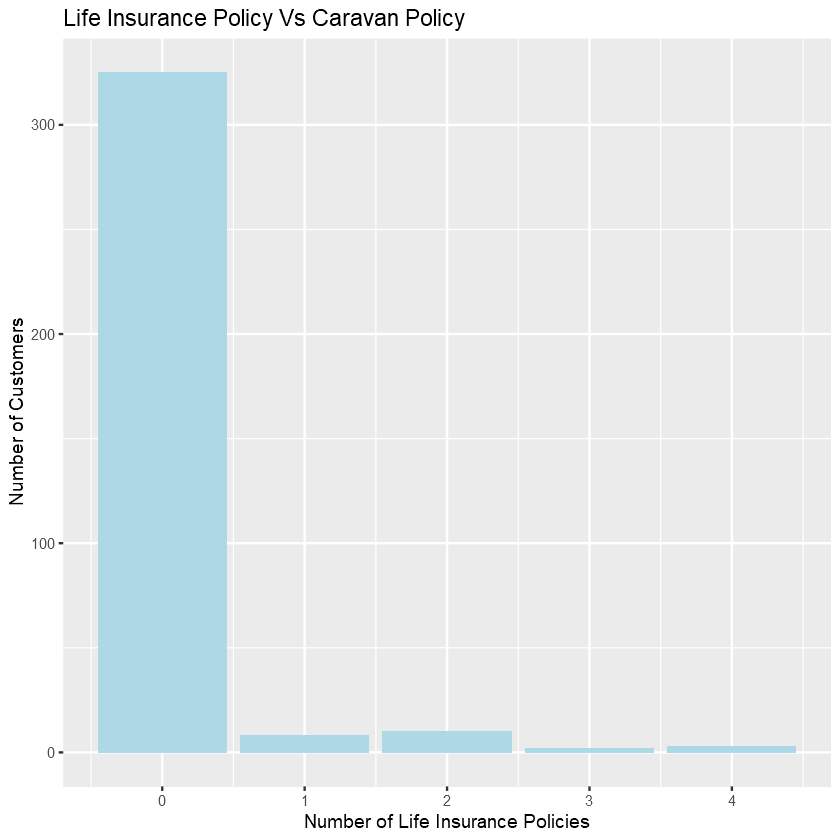

In [114]:
#Plot of average age vs caravan policy
ggplot(trainData[trainData$V86==1,], aes(V76)) + geom_bar(fill = "light blue") +
labs(y = "Number of Customers", x = "Number of Life Insurance Policies", title = "Life Insurance Policy Vs Caravan Policy")

#### Insights from the plot

Customers without any life insurance policy the ones with the highest number of a caravan insurance policy. This is also an actionable observation which can be used.

### Plotting the number of fire insurance policy with caravan policy

Now we can plot the customers' fire insurance policies with the purchase of caravan policy. 

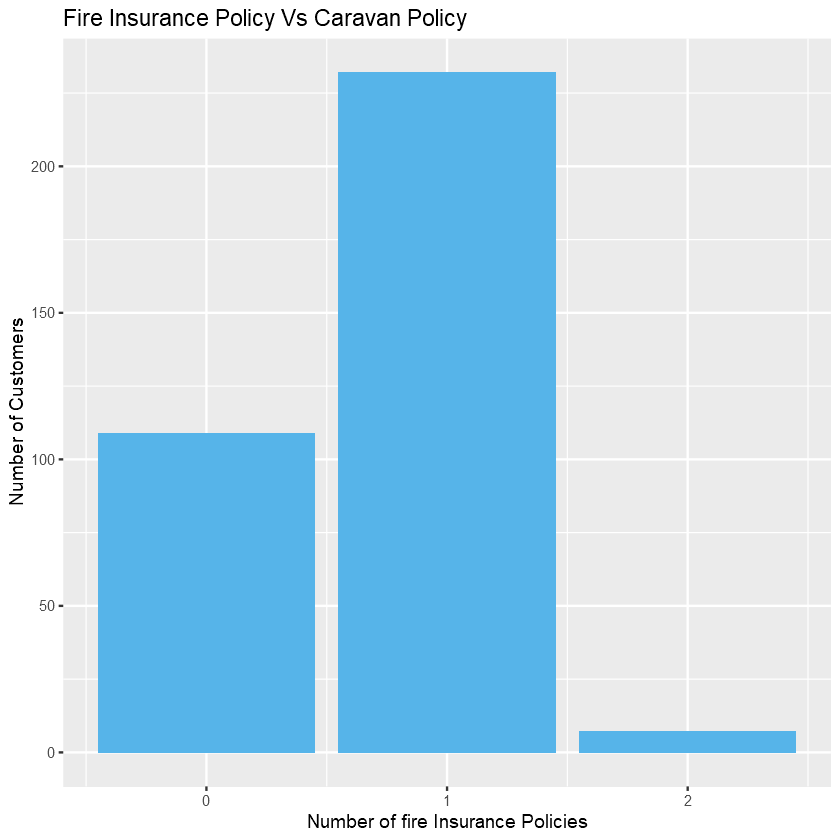

In [113]:
#Plot of average age vs caravan policy
ggplot(trainData[trainData$V86==1,], aes(V80)) + geom_bar(fill = "#56B4E9") +
labs(y = "Number of Customers", x = "Number of fire Insurance Policies", title = "Fire Insurance Policy Vs Caravan Policy")

#### Insights from the plot

We can see that most customers with 1 fire insurance policy have purchased a caravan insurance policy. But the number of customers with a caravan insurance policy without a fire insurance policy is also significant.

## Model Development



As the initial step we need to reduce the available predictors by using some methods so that we end up with a set of most significant variables which can be used to develop the models that we want. We can calculate the variance of all the columns of the training data and can eliminate the columns with a variance that is close to 0 or 0. The variables that have a low variance are not only non-informative, they can even break the model that we are trying to fit for the data that we have. Hence the variables that have variance greater than 0.01 are selected as variables for the next steps.

In [116]:
#Calculating the varaince of the columns
var_df = as.data.frame(sapply(trainData[,-ncol(trainData)], var))
#Changing the column names of data frame
colnames(var_df) = c('variance')

#Adding a new column 
var_df$variables = rownames(var_df)
#Prinitng few rows of the data frame
head(var_df)

Warning message in FUN(X[[i]], ...):
"Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector."

,variance,variables
V1,165.0378474,V1
V2,0.1647078,V2
V3,0.6238386,V3
V4,0.6635549,V4
V5,8.1610767,V5
V6,1.0064780,V6


In [118]:
#var_df1 <- var_df[order(var_df$variance),]
var_df2 = var_df[var_df$variance>0.01,]
variables_1 = var_df2$variables
variables_1 = c(variables_1,"V86")

In [133]:
variables_1

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32" "V33" "V34" "V35" "V36"
[37] "V37" "V38" "V39" "V40" "V41" "V42" "V43" "V44" "V45" "V46" "V47" "V48"
[49] "V49" "V50" "V51" "V52" "V53" "V54" "V55" "V56" "V57" "V58" "V59" "V61"
[61] "V62" "V63" "V64" "V65" "V66" "V67" "V68" "V69" "V70" "V72" "V73" "V74"
[73] "V75" "V76" "V80" "V83" "V85" "V86"

In [126]:
#Selecting the required variables
trainData = trainData[,variables_1]

dim(trainData)  #Dimensions of the data frame
head(trainData)

[1] 5822   79

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V72,V73,V74,V75,V76,V80,V83,V85,V86,V86.1
33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,0,1,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,0,1,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,0,1,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,0,1,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,0,1,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


### Stepwise variable selection

The process of selecting a subset of predictors(variables) that we believe have a strong association with the target variable is known as Subset Selection. As the number of columns in the dataset are 77 apart from target variable, seeing the relationship between each variable with the target would be an hideous task. It would be a good practice to select a subset of variables that would be probably influencing the customer decision of buying a caravan insurance policy. Various methods can be used to get a subset of variables. But I have selected the stepAIC function that is provided by package "MASS" which is gives a subset of variables using the AIC values. 

In [127]:
train_data = read.table('train.txt', header = FALSE)
train_data_1 = train_data
train_data_1 = train_data_1[,variables_1]
#install.packages("MASS")
#train_data$V86 <- as.factor(train_data$V86)
library(MASS)
# Fit the full model 
full.model = lm(V86 ~., data = train_data_1)
# Stepwise regression model
step.model = stepAIC(full.model, direction = "both", trace = FALSE)
summary(step.model)

Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message:
"attempting model selection on an essentially perfect fit is nonsense"Warning message in summary.lm(step.model):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = V86 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + 
    V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + 
    V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + 
    V30 + V31 + V32 + V33 + V35 + V36 + V37 + V38 + V39 + V40 + 
    V41 + V42 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + 
    V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V61 + V62 + 
    V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V72 + V73 + 
    V74 + V75 + V76 + V80 + V83 + V85 + V86.1 + V43, data = train_data_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.630e-16 -4.080e-19  4.670e-19  1.296e-18  1.048e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  2.308e-16  1.524e-17  1.514e+01  < 2e-16 ***
V1           6.986e-19  8.028e-20  8.701e+00  < 2e-16 ***
V2          -2.268e-18  2.735e-19 -8.291e+00  < 2e-16 ***
V3          -9.684e-19  2.557e-19 -3.788e+00 0.000154 ***
V4           1.817e-18  1.769e-19  

Using the summary of the step wise method we can select a subset of the predictors using the significance of the variables. The significance of the variables are indicated on the side of each column. The more the stars the more the significance of the predictor. The variables that have significance star are put into a vector and those columns are subsetted from the training data for the next steps. Once we extract the significant variables we need to analyse the effect of these variables on the response variable.

In [128]:
#Vector of significant variables
significant_variables = c('V4','V10','V17','V18','V41','V44','V46','V47','V55','V58','V59','V61','V76','V83','V85','V86')
length(significant_variables)

[1] 16

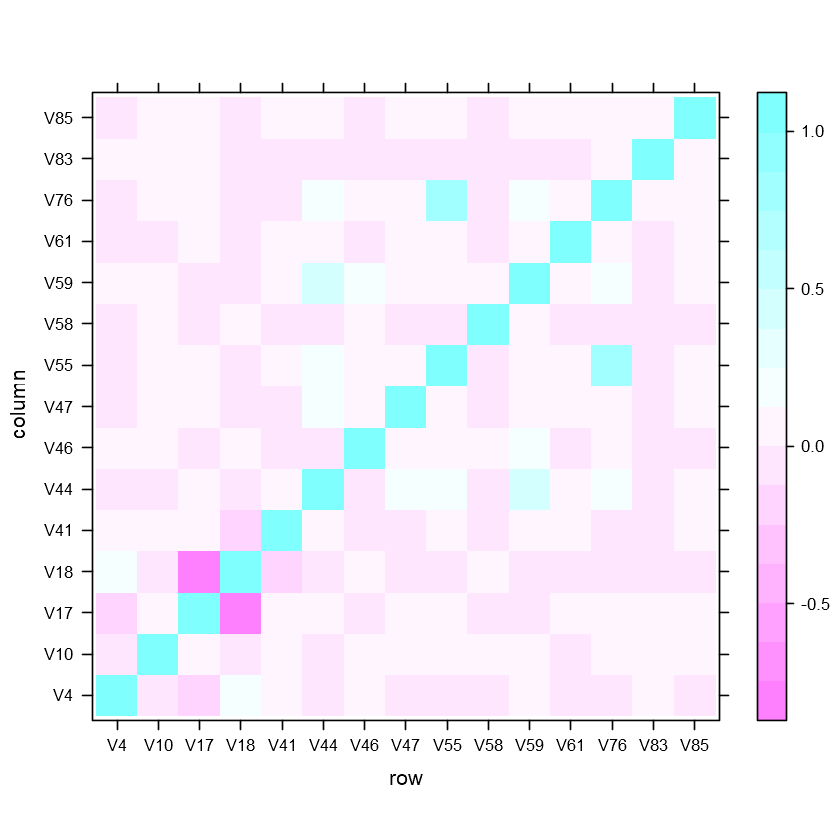

In [129]:
#install.packages("lattice")
new_train_data_1 = train_data_1[,significant_variables]
library(lattice)
#Plotting the correlation of the significant variables
levelplot(cor(new_train_data_1[,-ncol(new_train_data_1)]))

### Check for Collinearity

Among the selected variables we need to observe if there is any collinearity. We can use the ols_vif_tol method of "olsrr" to find the variance inflation factor and tolerance for each variable that we selected. The higher the inflation factor value the higher the correlation with the other variables.  

In [131]:
library(olsrr)
#cor(new_train_data)
fit.log = lm(V86 ~ ., data = new_train_data_1)
#summary(fit.log)
ols_vif_tol(fit.log)

Warning message:
"package 'olsrr' was built under R version 3.4.4"

ERROR: Error: package or namespace load failed for 'olsrr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'recipes' 0.1.1 is being loaded, but >= 0.1.4 is required


For all the varaiables with high VIF value we need to check if there is any correlation. Below are the correaltion matrices for the variables that show a high VIF value.  

In [139]:
#Finding the correlation between the columns
cor(new_train_data_1[,c("V55","V76")])

cor(new_train_data_1[,c("V17","V18")])

,V55,V76
V55,1.0000000,0.8501711
V76,0.8501711,1.0000000


,V17,V18
V17,1.0000000,-0.7475816
V18,-0.7475816,1.0000000


The columns V55 and V76, V17 and V18 are having high correlation value with each other. V55 and V76 represent the contribution to life insurances and number of life insurances respectively. The collinearity is expected as they are both related to life insurance policies. We will decide which variable to be included and which has to be excluded into the final model by looking which at the variance of each column. V17 and V18 represent Middle level education and Low level education values for the customers belonging to the same zip code. Even though the correlation between this is not as strong as the before, we need to include only one variable into our final model in order to get improve your prediction accuracy. 

In [140]:
sapply(new_train_data_1[,c("V17","V18","V55","V76")], var) #Finding the variance of the few columns

V17       V18       V55       V76 
3.1013032 5.2813798 0.8065833 0.1425586

The variance of the columns which are having collinearity was computed in the above cell. Including the variables that are having variance is logical, as these columns gives us more information about the response variable than the ones that are having a less variance. Among Middle Level Education and Low Level Education the variable with high variance is Lowe Level Education which is V18 column in the data. Between the contribution to life insurance and number fo life insurance we can select the contribution column as the variance of that is higher. So we exclude V17 and V76 columns from our significant variables.

In [179]:
#Removing V17 and V76 columns from the dataset
new_train_data_2 = new_train_data_1[,-which(names(new_train_data_1) %in% c("V17","V76"))]

In [142]:
dim(new_train_data_2) #printing the dimensions

[1] 5822   14

In [143]:
colnames(new_train_data_2)  #Printing the column names

[1] "V4"  "V10" "V18" "V41" "V44" "V46" "V47" "V55" "V58" "V59" "V61" "V83"
[13] "V85" "V86"

### Cross Validation for features

With the help of cross validation with lasso regularisation we can try to reduce the variables still more. But the results of the cross validation may not be completely reliable because there is a high chance of all variables coefficients might be given zero except a few. We make use of the "glmnet" package which provides us with methods that we can use for cross validation.

In [144]:
matrix_variables = model.matrix(V86 ~ ., data = new_train_data_2) #Matrix for storing the fit model
y = matrix_variables[,ncol(matrix_variables)]   #vector of the response variables
matrix_variables = matrix_variables[,-1]   #Dropping the final columns

In [145]:
cv.lasso = cv.glmnet(matrix_variables, y, alpha = 1)  #Cross validation with lasso

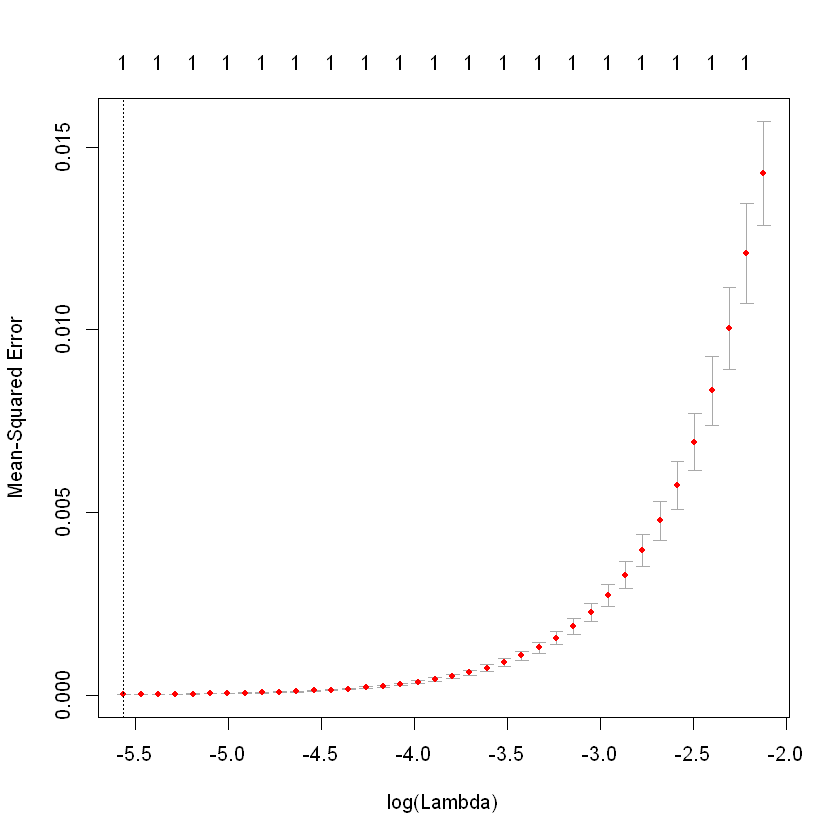

In [146]:
plot(cv.lasso)  #plotting the cross validation results

We select a lambda value that has been given to us by the cross validation model that we built above. With the lambda value given by the model we cam fit and predict the coefficients of the variables that we selected.

In [147]:
bestlam = cv.lasso$lambda.min   #Best lambda value
fit.lasso = glmnet(matrix_variables, y, alpha = 1)   #Fitting the model
predict(fit.lasso, s = bestlam, type = "coefficients")[1:14,]  #Predicted result

(Intercept)           V4          V10          V18          V41          V44 
0.0004560961 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         V46          V47          V55          V58          V59          V61 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 
         V83          V85 
0.0000000000 0.9680073286

The performance of the lasso cross validation is not useful for us. The reason for this is all the variables except the V85 column are given a coefficient of 0 by the model. But it doesn't make sense to put only one variable in the model as the caravan purchase is influenced by number of factors. 

So we try to explore the effect of these variables on the data in detail and try to decide if the variables are to be included in the model or not.

### Exploring the significant variables with the response

Now we have come up with a set of variables which are significant in predicting if a customer will buy a caravan policy are not. By exploring the variables relationship with the response we can understand the exact effect of the variable. The variables that were used not visualised before will be plotted against the number of customers with caravan insurance policy.

### Plotting the number of married people in a zip code with caravan policy

We can plot the number of customers who are married in a zip code is plotted against the number of customers who bought the caravan policy.

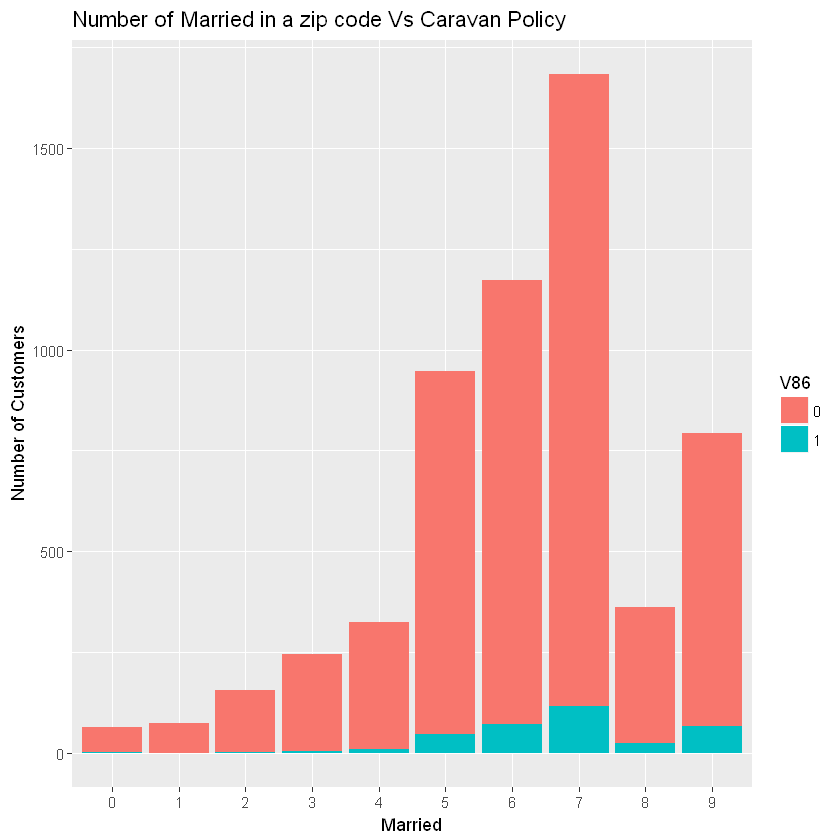

In [148]:

#Plot of average age vs caravan policy
train_data$V86 = as.factor(train_data$V86)
train_data$V10 = as.factor(train_data$V10)  #Changing into factor
#Plotting the number of married customers in a zip code vs number of customers with caravan policy
ggplot(train_data, aes(V10)) + geom_bar(aes(fill = V86)) +
labs(y = "Number of Customers", x = "Married", title = "Number of Married in a zip code Vs Caravan Policy")

#### Insights

There is a relationship between the number of customers in a zip code who are married with a customer buying a caravan policy is clearly seen in the plot. The customers who belong to a zip code where the number of married people is 7 have a high probability of buying a caravan insurance policy. But surpisingly there were very few customers who bought the caravan policy when the number of customers in the zip code was 8. If the number of customers is 1 then a customer from that zip code would be least probable to buy a caravan insurance policy. When we change the interpretation in general terms we can say that if a customer is from a zip code where there are very less number of married people, then a customer from that zip code would be young and not own a caravan.

### Plotting the number of people with low level education in a zip code with caravan policy

The next significant variable that we selected was low level education column which says the number of people in a zip code that had a low level education. To know the relationship between this variable with the response we can create a bar plot which might show us some trend.

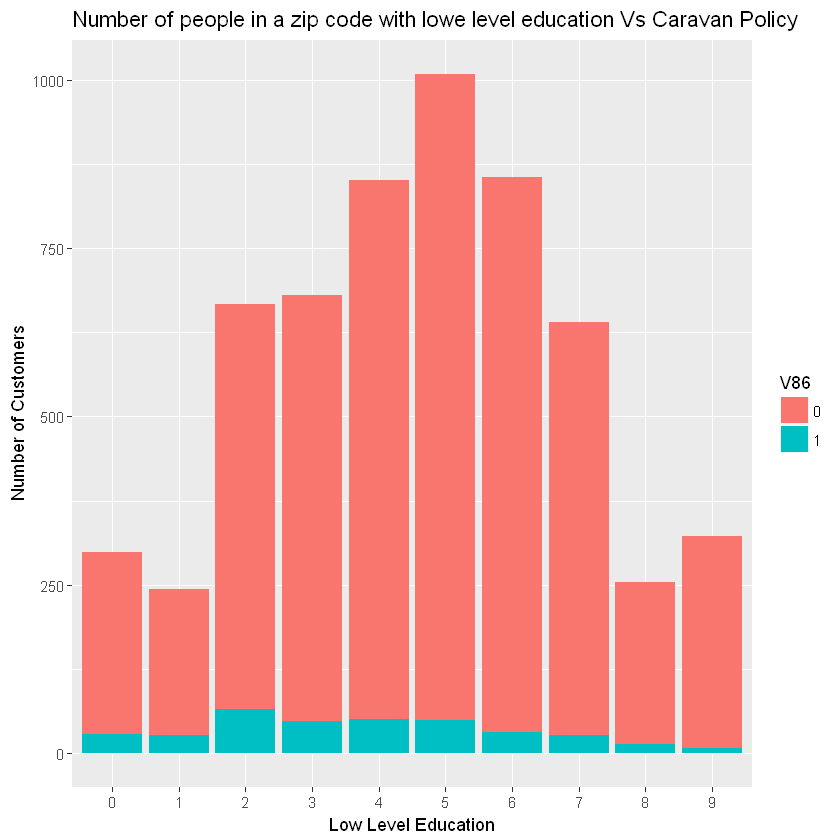

In [149]:
train_data$V18 = as.factor(train_data$V18)
#Plotting the number of customers in a zip code with low level education vs number of customers with caravan policy
ggplot(train_data, aes(V18)) + geom_bar(aes(fill = V86)) +
labs(y = "Number of Customers", x = "Low Level Education", title = "Number of people in a zip code with lowe level education Vs Caravan Policy")

#### Insights

The plot shows that the probability of a customer buying a caravan policy who is from a zip code where the number of people with low level education from 2 to 5 might be almost equal. Even for the value of 0,1,6, and 7 are almost equal in the plot. Including this variable in the final model may improve the performance of the model as the relationship is seen with the response. Hence this was included in the final predictor.

### Plotting the number of people with income > 123.000 in a zip code with caravan policy


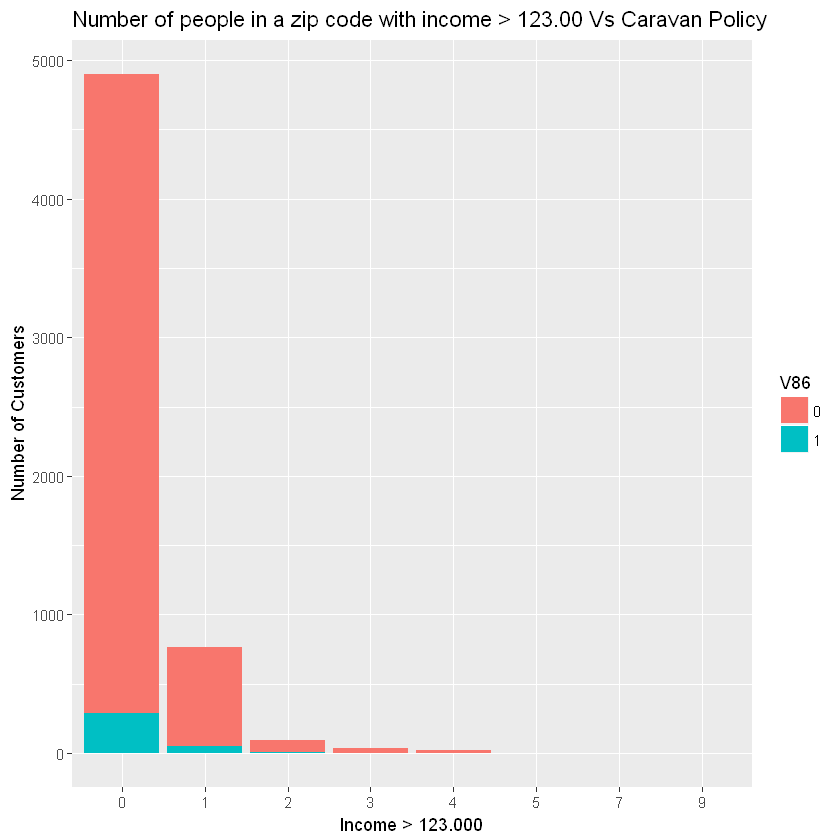

In [150]:
train_data$V41 = as.factor(train_data$V41)
#Plotting the number of customers in a zip code with low level education vs number of customers with caravan policy
ggplot(train_data, aes(V41)) + geom_bar(aes(fill = V86)) +
labs(y = "Number of Customers", x = "Income > 123.000", title = "Number of people in a zip code with income > 123.00 Vs Caravan Policy")

#### Insights

From the plot we can see that the number of customers in a zip code without an income > 123.000 is the highest. Among the customers who have income > 123.000 the probability of buying a caravan policy is low. This is an interesting observation where the people with more income are less likely to buy a caravan insurance policy as they may not own a caravan. Including this variable in the final model would help the model to predict the response is justified.

For all the next variables the data related to customers who bought the caravan policy is plotted. The reason for this is all the variables that we are gonna explore in the next sections is the ownership of products by the customers.  

### Plotting the Contribution to private third part insurances vs caravan policy purchase

Let's see how the contribution of customer to private third party insurances is affecting the decision of buying a caravan insurance policy.

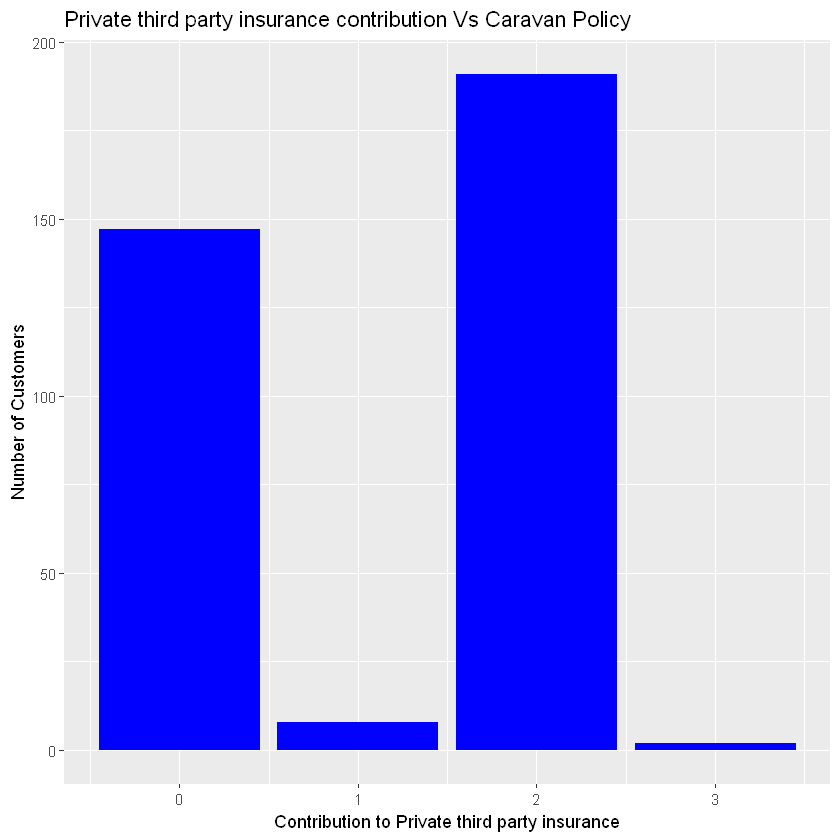

In [151]:
#Bar plot between V44 and V86 columns
ggplot(train_data[train_data$V86==1,], aes(V44)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to Private third party insurance", title = "Private third party insurance contribution Vs Caravan Policy")

#### Insights

When the customers' contribution to private third party insurance is 0 and 2 has the most number of purchases of caravan policies. And when the contribution value is 1 and 3 then purchase of caravan policy is low. The levels represented for this numeric values are given in the description of variables. So including this variable in the final model would help us in predicting if the customer wants to buy a policy or not.

In [152]:
### Plotting the contribution of customer to third party insurance policy related to agriculture vs caravn policy

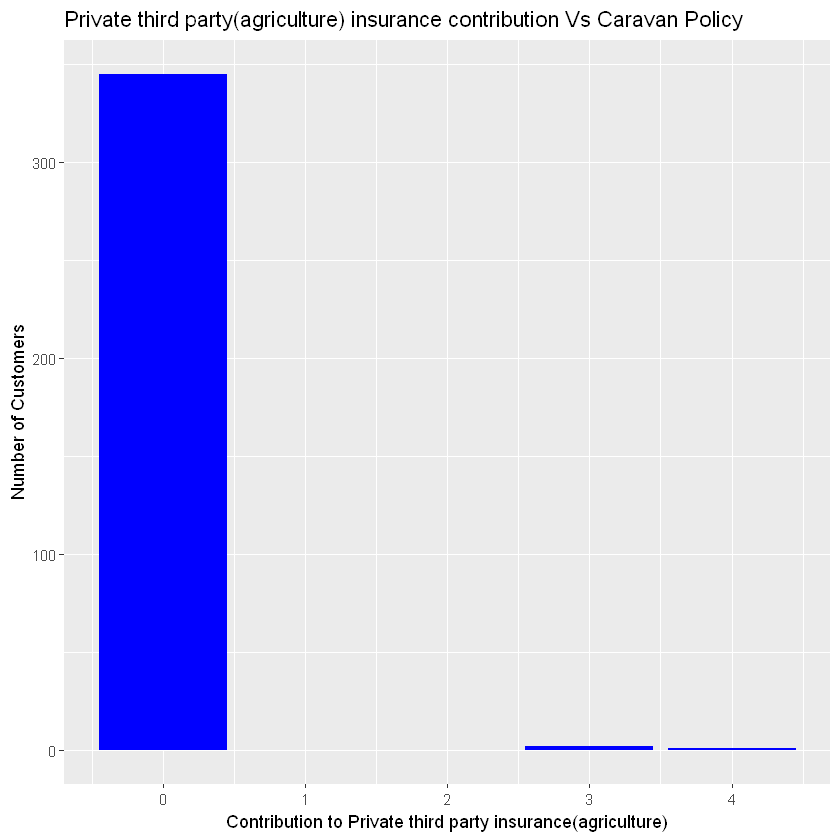

In [153]:
#Bar plot between V46 and V86
ggplot(train_data[train_data$V86 == 1,], aes(V46)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to Private third party insurance(agriculture)", title = "Private third party(agriculture) insurance contribution Vs Caravan Policy")

### Insights

The customers who haven't spent much on the private third party insurance(agriculture) has the most probability of buying a caravan policy. And the customers who contribute in the levels 3 and 4 also bought caravan policy but the value is very low compared to the level 0. This feature in the model would not let it learn better for predicting if the customer is gonna buy a caravan policy or not.

### Plotting the contribution to car policy vs caravan policy

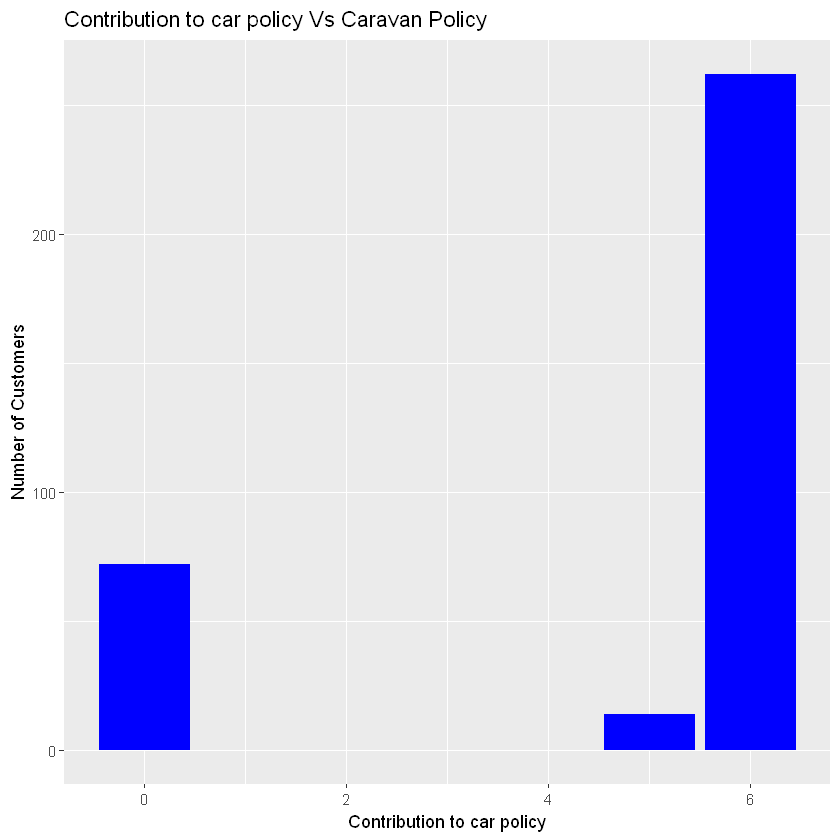

In [154]:
#Bar plot between V47 and V86
ggplot(train_data[train_data$V86==1,], aes(V47)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to car policy", title = "Contribution to car policy Vs Caravan Policy")

#### Insights

The customer who is contributing more to the car policy is having a high probability of buying a caravan policy. Even the customer who doesn't contribute much for the car policy is also having a good probability of buying a caravan policy. 

### Plotting contibution to life insurance vs Caravan policy


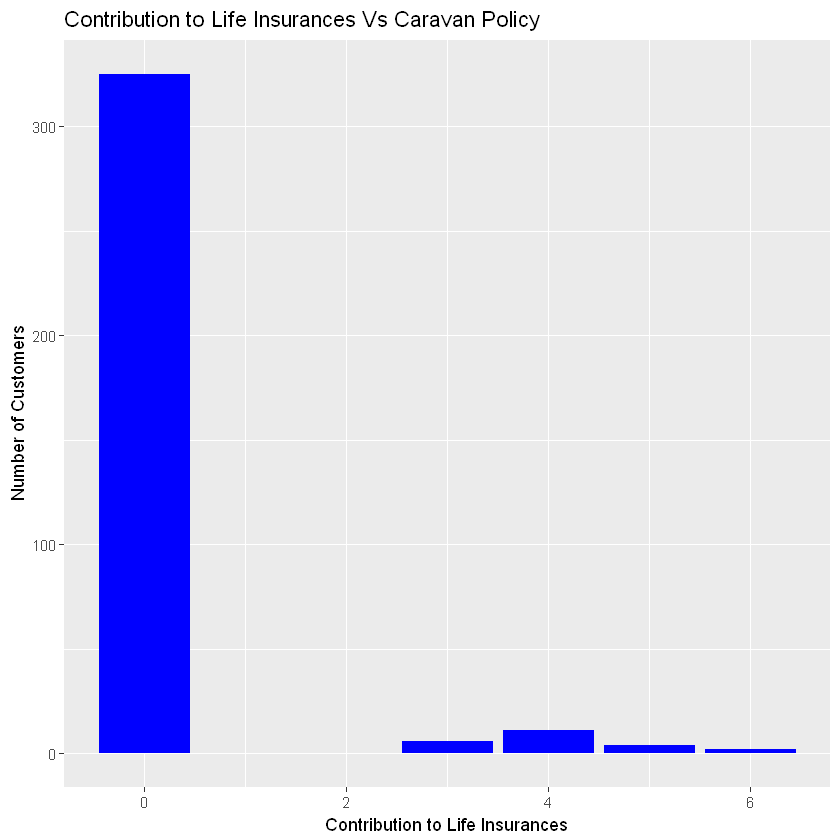

In [155]:
#Bar plot between V55 and V86
ggplot(train_data[train_data$V86==1,], aes(V55)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to Life Insurances", title = "Contribution to Life Insurances Vs Caravan Policy")

#### Insights

The customers who don't contribute much for life insurance have bought the most caravan policy according to the plot. The other levels 3,4,5, and 6 does have some customers who purchased a caravan policy but the values are not as high as the level zero.

### Plotting the contribution to disability insurance policy vs caravan policy purchase

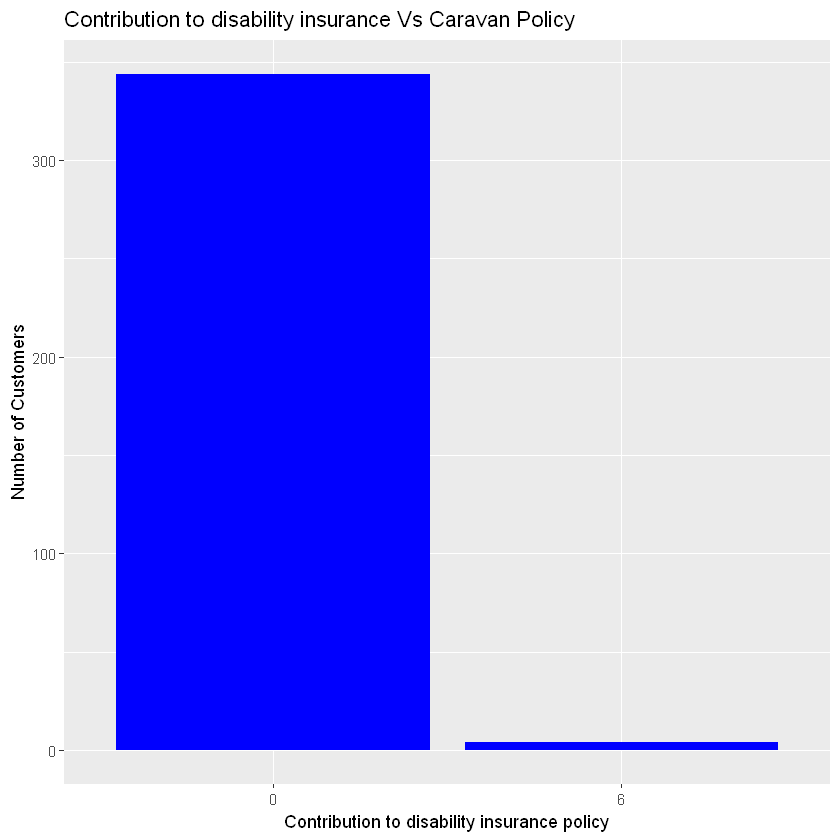

In [156]:
#Bar plot of V58 vs V86
train_data$V58 = as.factor(train_data$V58)
ggplot(train_data[train_data$V86==1,], aes(V58)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to disability insurance policy", title = "Contribution to disability insurance Vs Caravan Policy")

#### Insights

The plot shows that the customers who don't contribute for disability insurance policy buy the most of the caravan policy according to this column values. The levels 4,5,6 and 7 are all combined into one value by the plot. The inclusion of this variable in the final model would not increase the performance. So we need to exclude this variable in the final predictor list.

### Plotting contribution to fire policy vs caravan policy

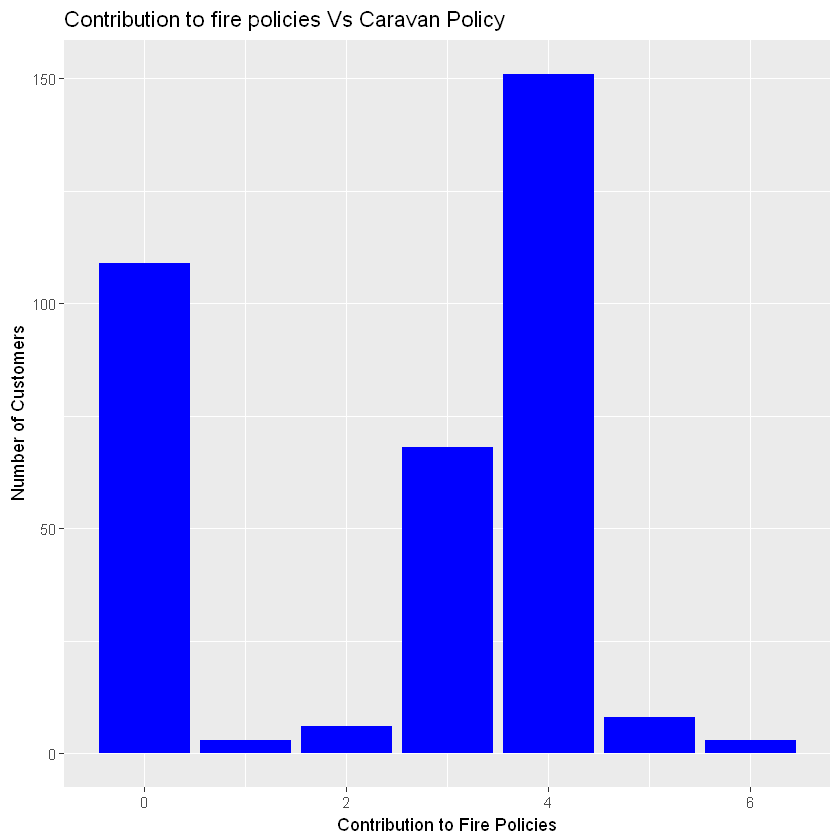

In [157]:
#Bar plot of V59 vs V86
ggplot(train_data[train_data$V86==1,], aes(V59)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to Fire Policies", title = "Contribution to fire policies Vs Caravan Policy")

#### Insights

From the plot we can see that the customers who have the contribution level as 4 have the highest probability of buying a caravan policy. Then the customers with levels 3 and 0 are also having a good probability of purchasing a caravan policy. So including this variable would enhance the performance of the model.

### Plotting Contibution to Boat policies vs caravan policy

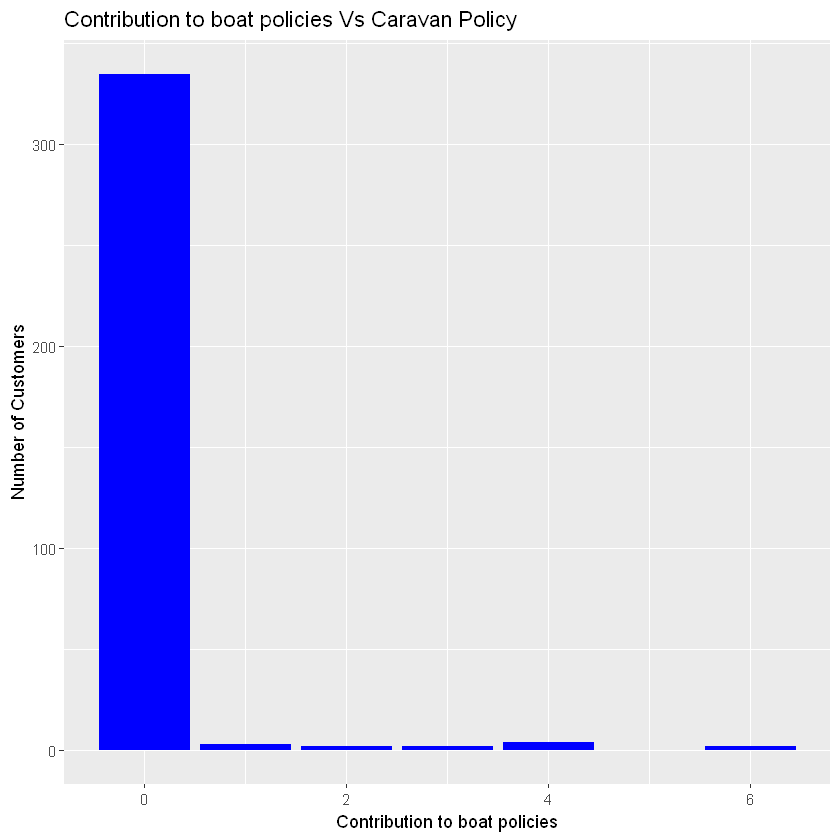

In [158]:
#Bar plot of V61 vs V86

ggplot(train_data[train_data$V86==1,], aes(V61)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Contribution to boat policies", title = "Contribution to boat policies Vs Caravan Policy")

#### Insights


The customer who hasn't contributed to boat policy is the highest among the customers who bought a caravan policy. This was a common trend that we are observing among the variables that we are exploring in the top also. The customers who have the contribution level as 4 are the second highest values which is much lesser than the values of the customers with level zero. But we can add this variable to the model as there is a clear dispersion in the number of customers who bought caravan policy.

### Plotting the number of bicycle policies vs caravan policy

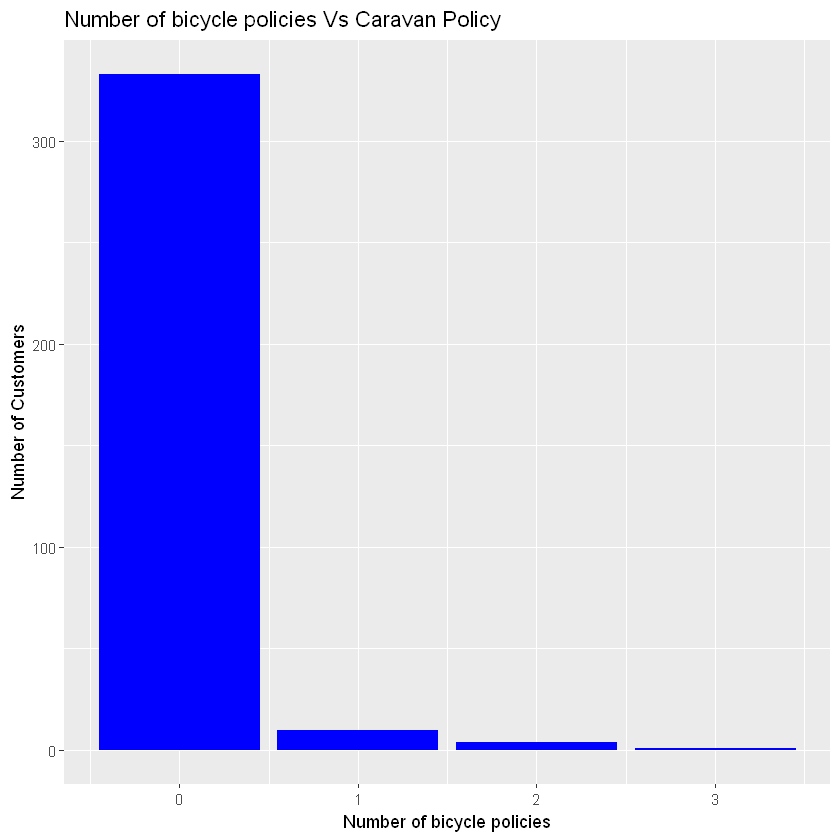

In [159]:
#Bar plot of V83 vs V86
ggplot(train_data[train_data$V86==1,], aes(V83)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Number of bicycle policies", title = "Number of bicycle policies Vs Caravan Policy")

### Insights

The distribution in the plot shows that the customers who don't have any bicycle policies are highly probable of purchasing a caravan policy. The probability of purchase of caravan decreases rapidly for all the customers with 1,2 and 3 bicycle policies. This would let the model learn better from this variable so we need have to include it in the final model.

### Plotting number of social security insurance policies vs caravan policy

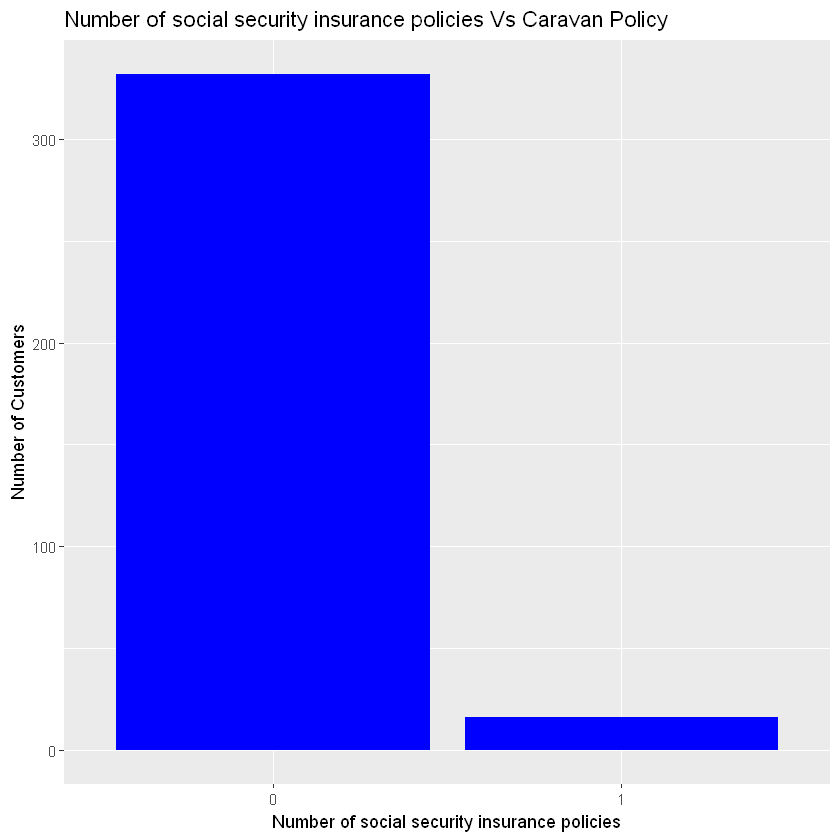

In [160]:
#Bar plot of V85 vs V86
train_data$V87 = as.factor(train_data$V85) #Adding a new column
#bar plot between V85 and V86
ggplot(train_data[train_data$V86==1,], aes(V87)) + geom_bar(fill = "blue") +
labs(y = "Number of Customers", x = "Number of social security insurance policies",
     title = "Number of social security insurance policies Vs Caravan Policy")

#### Insights

We can clearly see that the customers with no social security insurance policy are the ones that might buy a caravan policy. The number of customers in this column with zero value might be large when compared to the customers with any number of social security insurance policies. But the influence of this predictor in the model would be significant as there is a clear difference that we can see in the buckets. So we are gonna include this variable in significant variables list.

After the extensive exploration of the selected variables, we have come to a conclusion on which variables to be included in the model and which need not be. So the final predictor columns that were selected are V4, V10, V18, V41, V44, V47, V55, V59, V61, V83, V85. In the next sections, we build three different types of models for predicting the probability of a customer purchasing a caravan policy. 

In [161]:
significant_variables

[1] "V4"  "V10" "V17" "V18" "V41" "V44" "V46" "V47" "V55" "V58" "V59" "V61"
[13] "V76" "V83" "V85" "V86"

In [162]:
colnames(new_train_data_2)

[1] "V4"  "V10" "V18" "V41" "V44" "V46" "V47" "V55" "V58" "V59" "V61" "V83"
[13] "V85" "V86"

In [163]:
#Final variables list which are most significant
final_variables = c("V4","V10","V18","V41","V44","V47","V55","V59","V61","V83","V85","V86")

final_train_data = new_train_data_2[,final_variables]   #Subsetting the significant variables
#Changing the response to factor
final_train_data$V86 = as.factor(final_train_data$V86)
#First 5 rows of training data
head(final_train_data)

V4,V10,V18,V41,V44,V47,V55,V59,V61,V83,V85,V86
2,7,7,0,0,6,0,5,0,0,0,0
2,6,4,0,2,0,0,2,0,0,0,0
2,3,4,0,2,6,0,2,0,0,0,0
3,5,2,0,0,6,0,2,0,0,0,0
2,7,0,0,0,0,0,6,0,0,0,0
1,0,4,0,0,6,0,0,0,0,0,0


## Logistic Regression

Logistic regression is a classification model that can used when the response variable is binary. This type of regression is used to describe the data and to explain the relationship between on or more ordinal, nominal and one binary dependent variable. The logistic regression is build by activating the linear regression function through a sigmoid function where the values given by the model are only between 0 and 1. This values are the probability that the response varaible will be 1. Logistic regression models the probability that the response varaible belongs to a particular category not the response varaible directly.

In this assessment, the decision of a customer buying a caravan policy has 0 and 1 as the values, which is a binary value. The data has independent variables which are nominal, ordinal. All these factors justify the usage of logistic regression for predicting the most probable 800 customers from the given test data. Hence the first type of the model that was developed for this task is logistic regression.

In [164]:
#Logistic model for the training data
log_model = glm(V86 ~., data = final_train_data, family = binomial)
summary(log_model)  #Summary


Call:
glm(formula = V86 ~ ., family = binomial, data = final_train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6045  -0.3850  -0.2660  -0.1834   3.1685  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.68245    0.36073 -12.980  < 2e-16 ***
V4           0.11232    0.07277   1.543  0.12274    
V10          0.14648    0.03313   4.421 9.82e-06 ***
V18         -0.15814    0.02580  -6.129 8.82e-10 ***
V41         -0.17534    0.10808  -1.622  0.10474    
V44          0.19022    0.06807   2.794  0.00520 ** 
V47          0.22715    0.02390   9.503  < 2e-16 ***
V55         -0.05021    0.05518  -0.910  0.36284    
V59          0.11271    0.03537   3.187  0.00144 ** 
V61          0.55065    0.10743   5.126 2.97e-07 ***
V83          0.48759    0.19994   2.439  0.01474 *  
V85          0.62946    0.29595   2.127  0.03343 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial famil

In [165]:
probs2 = predict(log_model, test_data, type = "response")  #Probabilities of logistic model

#Changing the column name of test labels
colnames(test_labels) = "test_labels"
#Add the test lables to test data
new_test_data = cbind(test_data, test_labels)
#Appending the predicted probabilities
new_test_data$prob_pred = probs2

#Sorting the data using the probabilities
val_data = new_test_data[order(new_test_data$prob_pred,decreasing=TRUE),]
#Selecting the first 800 customers
val_data_1 = val_data[1:800,]
#The response variable for the customers
val_data_1$pred_policy = rep("1",nrow(val_data_1))

#validating the predictions
nrow(val_data_1[val_data_1$test_labels == val_data_1$pred_policy,])/800

[1] 0.135

The confusion matrix for the above reuslts would be bit different as the value of the response variable is only 1. The below cell generates a confusion matrix type table for the above predictions

In [166]:
#Confusion matrix 
table(val_data_1$test_labels,val_data_1$pred_policy)

   
      1
  0 692
  1 108

The score generated for the logistic model is calculated and the value is 0.135. This doesn't represents the accuracy of the model. This the score that represent the fraction of customers that we predicted actually bought the caravan policy. We compare the values of our predicted customers with the provided test labels. Now we need to model your next type of model Linear Discriminant Analysis method. This is to see if the score can be increased if the predicted method is changed.

## Linear Discriminant Analysis

Linear discriminant analysis is a generalisation of Fisher's linear discriminant method which is used in finding the linear combination of the features that characterizes two or more classes of the response variable. LDA attempts to express one dependent variable as a linear combination of independent variables. In LDA we directly  model the distribution of independent variables in each of the response classes. Then we use Bayes theorem to flip these around into estimates for the class probabilities. LDA assumes that the observations of each class are drawn from a multivariate gaussian distribution with a class specific mean and a covariance matrix that is common for all the classes.

The parameters of the logistic model are surprisingly unstable when the classes of the response variable are well separated. For predicting the 800 most probable customers we can use lda and compare the results with the logistic regression. If the response variable in the given data set can be explained as a linear combination of the independent variables then LDA might perform better than the logistic regression. This is the reason why I choose to perform LDA for prediction.

In [167]:

library(MASS)
#LDA model for the training data
lda_model <- lda(V86~., data = final_train_data)
lda_model  #printing the model

Call:
lda(V86 ~ ., data = final_train_data)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
        V4      V10      V18       V41       V44      V47       V55      V59
0 2.990318 6.149616 4.624954 0.2029594 0.7478992 2.859335 0.1899890 1.782974
1 3.005747 6.715517 3.747126 0.1982759 1.1379310 4.718391 0.2701149 2.531609
         V61        V83        V85
0 0.01260504 0.02995981 0.01223968
1 0.11781609 0.06034483 0.04597701

Coefficients of linear discriminants:
            LD1
V4   0.13527659
V10  0.13942160
V18 -0.16765369
V41 -0.19151048
V44  0.22712666
V47  0.20118820
V55 -0.04719811
V59  0.12282912
V61  1.40302437
V83  0.74611551
V85  1.60048151

In [168]:
new_test_data_lda <- cbind(test_data, test_labels)  #Adding the test labels to test data
#Preicting using the lda model
pred.lda = predict(lda_model, test_data)


In [175]:
#Appending the predicted probabilities
new_test_data_lda$prob_pred = pred.lda$posterior[,2]

#Sorting the data using the probabilities
val_data = new_test_data_lda[order(new_test_data_lda$prob_pred,decreasing=TRUE),]
#Selecting the first 800 customers
val_data_1 = val_data[1:800,]
#The response variable for the customers
val_data_1$pred_policy = rep("1",nrow(val_data_1))

#validating the predictions
nrow(val_data_1[val_data_1$test_labels == val_data_1$pred_policy,])/800


[1] 0.13875

In [176]:
#Confusion matrix 
table(val_data_1$test_labels,val_data_1$pred_policy)

   
      1
  0 689
  1 111

The score value for the LDA is higher than the score of the logistic model. Even though the difference is small there was still an enhancement of the score value. The reason for this would be that LDA was able to learn a little better the linear combination of the independent variable with the response variable. Logistic also performed well as the target variable is binary and the response is linearly related to most of the independent variables. 

As expected by us the score value is increased when we apply LDA on the given data set. By what if we apply a different method that does the prediction that is similar to LDA, but overcomes the limitation of using a single covariance matrix for all the classes of the response. 

## Quadratic Discriminant Analysis

QDA is an alternative approach that similar to LDA which assigns a different covariance matrix for each class of the response variable. QDA is a flexible classifier than LDA which can lead to improved prediction performance. As the number of training data points is also large we can apply QDA in this case.


In [170]:
#QDA model for the training data
qda_model = qda(V86~., data = final_train_data)
#QDA model
qda_model

Call:
qda(V86 ~ ., data = final_train_data)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
        V4      V10      V18       V41       V44      V47       V55      V59
0 2.990318 6.149616 4.624954 0.2029594 0.7478992 2.859335 0.1899890 1.782974
1 3.005747 6.715517 3.747126 0.1982759 1.1379310 4.718391 0.2701149 2.531609
         V61        V83        V85
0 0.01260504 0.02995981 0.01223968
1 0.11781609 0.06034483 0.04597701

In [177]:
new_test_data_lda = cbind(test_data, test_labels)  #Adding the test labels to test data

#Predictions with QDA model
pred_qda = predict(qda_model, test_data)

#Appending the predicted probabilities
new_test_data_lda$prob_pred <- pred_qda$posterior[,2]

#Sorting the data using the probabilities
val_data = new_test_data_lda[order(new_test_data_lda$prob_pred,decreasing=TRUE),]
#Selecting the first 800 customers
val_data_1 = val_data[1:800,]
#The response variable for the customers
val_data_1$pred_policy = rep("1",nrow(val_data_1))

#validating the predictions
nrow(val_data_1[val_data_1$test_labels == val_data_1$pred_policy,])/800


[1] 0.1275

In [178]:
#Confusion matrix 
table(val_data_1$test_labels,val_data_1$pred_policy)

   
      1
  0 698
  1 102

Surprisingly the score for the QDA model is much lesser than the logistic and linear discriminant model. The reason for this could be the QDA model would have been fitted a quadratic model to the training data set which led to overfitting the model. Instead of using a line for classifying the datapoints the qda would have fit a complex structure while training.

## Model Comparison

Among the three types of models that are built in the above cells has a clear difference in the score of the models. The linear discriminant model has performed the best with a score of 0.1387. QDA had the least score which was 0.1275. With the score as selection criteria we decide to use LDA to subset 800 customers from the test data set. 

In [172]:
#Sorting the data using the probabilities
val_data = new_test_data_lda[order(new_test_data_lda$prob_pred,decreasing=TRUE),]
#Selecting the first 800 customers
val_data_1 = val_data[1:800,]
#The response variable for the customers
val_data_1$pred_policy = rep("1",nrow(val_data_1))


In [173]:
head(val_data_1)  #Printing 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V79,V80,V81,V82,V83,V84,V85,test_labels,prob_pred,pred_policy
292,33,1,2,4,8,0,2,0,7,9,...,0,1,0,1,0,0,0,0,1,1
576,8,1,2,4,2,2,2,2,5,7,...,0,1,0,2,0,0,0,1,1,1
790,24,1,2,3,5,1,5,1,3,4,...,0,1,0,1,0,0,0,0,1,1
1826,23,1,2,2,5,1,2,2,5,5,...,0,1,0,0,4,0,0,0,1,1
1996,13,2,3,2,3,1,2,2,5,7,...,0,1,0,1,0,0,0,0,1,1
2622,12,1,3,2,3,0,5,0,4,5,...,0,1,0,1,0,0,0,1,1,1


## Variable Identification and Explanation

In this section we understand how the significant variables that we selected for building model are influencing the response variable. 

#### Contribution to Car Policies 

Among all the selected variables the most influencing feature is the contribution to car policies. This can be seen in the stepwise regression result that we have developed in the above sections. The p-value can be used as a parameter to decide which is the most significant feature. The relationship is roughly linear between this feature and the target variable. It is evident that if a customer spends more on car policies then there is a high chance of customer being an owner of caravan policy. We can say that a customer with a caravan policy would likely be having insurance on more than one car. The chance of a customer buying a caravan policy when he doesn't have atleast one policy is extremely low. This can be a good feature to focus on when marketing the caravan policy to the customers. 


#### Level of Education and Income
Education level is the next feature that is influencing the target variable. The relationship might not be direct with the purchase of a caravan policy. Income of a customer might be dependent on the education level of them. A customer with a low education level is less likely to have a high income. As the income is not high the probability of the customer buying a caravan policy is very less. A very important factor that can be considered while selecting customers for advertising.

#### Contribution to Fire and third party insurance Policies

Next feature that have a significant effect on the customers decision of buying a caravan policy is the contribution that they make on fire policies and third party insurance policies. The fact that the customer is willing to spend on fire policies and third party insurance policies tells us that the customer might belong to the upper middle class family target population. We can assume that a customer might be willing to buy a caravan policy when the can afford fire and third party insurance policies. 

#### Contribution to Boat Policy

This was an interesting feature which helps to understand the customers choice of buying caravan policy. The plot of this variable with the target variable shows that if a customer doesn't contribute to boat policy, then their probability of buying a caravan policy is high. In general the chance of owning a boat and a caravan by the same customer is highly unlikely. 

#### Age

The next influential feature is the age group of the customers. Customers belonging to the age group 20-30 and the customers who are having a age above 60 years are having a less likely to buy a caravan policy. But the customers in the age groups 30-40 and 40-50 are having a high probability of buying a caravan policy. This is understandable as the customers in there middle ages would be more adventurous and would own a caravan if they are frequent travellers. Customers having age below 25 years and above 60 years wouldn't be much interested in purchasing a caravan even if they like travelling.

#### Married

The married column in the dataset is a socio demographic feature that is same for all the customers that belong to the same zip code. If a customer belongs to a neighbourhood where the number of married is more then he is more likely to purchase a caravan policy.

#### Marketing Strategies

We can develop some marketing strategies to target customers who would buy a caravan policy using the above variables which are influencing the target variable. Out of the 800 customers that were selected we can first focus on marketing to the customers who contibute to car policies, fire policies or third party insurance policies. If a customer contributs to all of them then marketing to such a customer would result in a purchase. The marketing can be targeted to the customer who doesn't have low education level, belongs to upper middle class family in there mid 30's, living in a neighbourhood where most of the customers are married. By implementing these strtagies into the business modelling the caravan policy sellers are having a high chance of a conversion.

The policy sellers should not worry about the customers who don't possess any type of product ownership as they are likely to have a low education level with less income. The marketers can focus less on marketing to customers who are elder than 60 years as there would a less chance of them buying a caravan policy.

## Conclusion

* This assessment foucses on how to deal with real world data science problem and helped me in understanding the steps to be followed for a data science project.
* The feature selection methods were the most important and interesting part of model development. The selection of features for the final model would influence the performance of models.
* Exploring the relationship between the independent variables with the target variable is the vital step in understanding the significance of the feature.
* Developing multiple models were essential in this problem as the selection of the model also plays an important role in selecting the best 800 customers as different models give different results.
* Finally developing the marketing strtagies which can be understood by a person who doesn't have any technical background was the output that is expected from the entire data analysis that is performed in the task.